# GreatApeT2T-G4s `notebook#1`
This jupyter notebook contains code snippets to generate:
 1. Upset plots to show the number of pG4s shared between the great apes.
 2. NEXUS files for PAUP phylogenetic analysis.
 3. Correlation between different pG4 combinations and their correlation with divergence times. 

In [1]:
from itertools import combinations
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import upsetplot as upsplt
import warnings

warnings.simplefilter("ignore", category=FutureWarning)
warnings.simplefilter("ignore", category=UserWarning)

In [2]:
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['font.size'] = 9
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

## 1. To read the data file, generate the presence-absence matrix, and generate upset plot

#### Define functions and required dictionaries

In [3]:
# colorblind friendly palette
CBPalette = {
    "Black": "#000000",
    "Orange": "#F4A637",
    "Light blue": "#B6DBFF",
    "Vermilion": "#DB5829",
    "Mid blue": "#7BB0DF",
    "Maroon": "#894B45",
    "Dark blue": "#1964B0",
    "Light purple": "#D2BBD7",
    "Light teal": "#00C992",
    "Purple": "#AE75A2",
    "Teal": "#008A69",
    "Dark purple": "#882D71",
    "Dark teal": "#386350",
    "Grey": "#DEDEDE",
    "Yellow": "#E9DC6D"
}

# dictionary of species names
speciesnos = {
    1: ['human','Homo_sapiens','hs1','H. sapiens'],
    2: ['bonobo','Pan_paniscus','pan','P. paniscus'],
    3: ['chimp','Pan_troglodytes','pan','P. troglodytes'],
    4: ['gorilla','Gorilla_gorilla','gor','G. gorilla'],
    5: ['sorang','Pongo_abelii','pon','P. abelii'],
    6: ['borang','Pongo_pygmaeus','pon','P. pygmaeus']
}

In [4]:
def comma_formatter(x, pos):
    '''Return a string of the number formatted 
    with commas at the thousands marker'''
    return '{:,.0f}'.format(x)

def stackedBarUpset(upsetDatadf, species, alignedUnique):
    '''Function for modulating the data for 
    the stacked-bar upset plot'''
    upsetDatadf.reset_index(inplace=True)
    for nos, target in enumerate(species):
        condition = ((upsetDatadf[target] == True) & 
                     (upsetDatadf[[s for s in species if s != target]].eq(False).all(axis=1)))
        condition_indices = upsetDatadf[condition].index
        upsetDatadf.loc[condition_indices[:alignedUnique[nos]], "forUnique01"] = "Aligned species-specific pG4s"
        upsetDatadf.loc[condition_indices[alignedUnique[nos]:], "forUnique01"] = "Unaligned species-specific pG4s"
    upsetDatadf.set_index(species, inplace=True)
    return upsetDatadf

def splitIDsandarrange(df):
    '''Function for splitting the IDs and arranging 
    the columns in the right order'''
    dfOut = df[0].str.split('|', expand=True)
    dfOut.columns = ['species', 'chrom', 'start', 'strand', 'length', 'score']
    dfOut['species'] = dfOut['species'].astype(int)
    dfOut['start'] = dfOut['start'].astype(int)
    dfOut['length'] = dfOut['length'].astype(int)
    dfOut['end'] = dfOut['start'] + dfOut['length']
    dfOut.sort_values(by=['species','chrom', 'start'], inplace=True)
    dfOut['chrom'] = dfOut['chrom'].apply(lambda x: f'chr{x}')
    dfOut.drop(columns=['length'], inplace=True)
    dfOut.reset_index(drop=True, inplace=True)
    dfOut["dummy"] = '.'
    dfOut = dfOut[['species', 'chrom', 'start', 'end', 'dummy', 'score', 'strand']]
    return dfOut

In [5]:
''' load the aligned species-specific pG4s dataset'''
alignedUniquedf = pd.read_csv('../datasets/pipelineOutputs/alignedUniquehsaG.egs.gz', sep='\t', header=None, compression='gzip')
alignedUniqueGQs = splitIDsandarrange(alignedUniquedf)

''' load the hsa and chr relationship dataset '''
hsa_align_map = "../datasets/dataForAnalysis/maps/align.hsa.map"
hsa_map = pd.read_csv(hsa_align_map,sep="\t",header=0,index_col=0)

''' load the species-order required'''
order = ["P. paniscus", "P. troglodytes", "H. sapiens", "G. gorilla", "P. pygmaeus", "P. abelii"]

#### To generate the Upset plots

Completed for 1
Completed for 2
Completed for 3
Completed for 4
Completed for 5
Completed for 6
Completed for 7
Completed for 8
Completed for 9
Completed for 10
Completed for 11
Completed for 12
Completed for 13
Completed for 14
Completed for 15
Completed for 16
Completed for 17
Completed for 18
Completed for 19
Completed for 20
Completed for 21
Completed for 22
Completed for X
Completed for Y
Completed for G


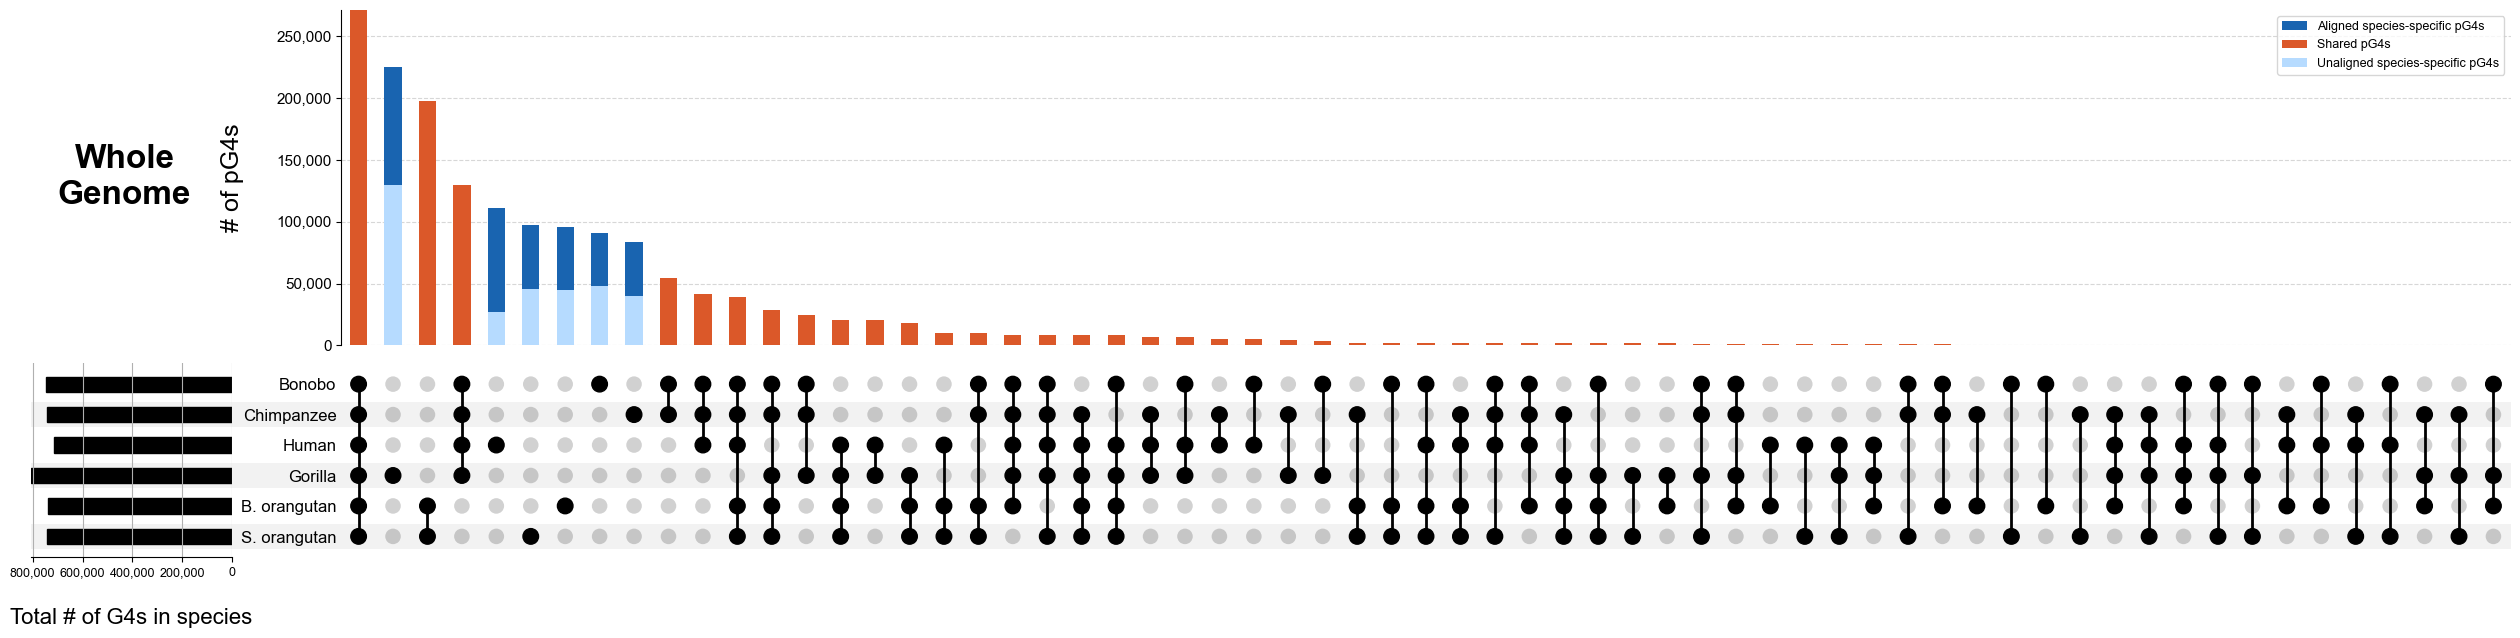

In [6]:
for hsa in list(range(1,23)) + ["X", "Y", "G"]:

    '''Read the .dat output file of pG4s shared by great apes'''
    if hsa != "G":
        df = pd.read_csv(f"../datasets/pipelineOutputs/hsa{hsa}/allhsa{hsa}.graph.df.gz", header=0, sep="\t", low_memory=False, compression="gzip") #read the file
    else:
        df = pd.read_csv(f"../datasets/pipelineOutputs/allhsa{hsa}.graph.df.gz", header=0, sep="\t", low_memory=False, compression="gzip") #read the file

    '''Generate the presence-absence matrix'''
    presabs = []
    grouped_df = df.groupby("ID")
    for name, group in grouped_df:
        specieslist = [0] * 6
        presspecies = group["SPECIES"].unique() #get the species which have atleast one pG4 in the shared group
        for index in presspecies:
            specieslist[index-1] = 1
        presabs.append(specieslist)
    presAbs_df = pd.DataFrame(presabs, columns=[i[3] for i in speciesnos.values()])
    presAbs_dfUpset = presAbs_df[order]
    speciesUpset = order

    '''To get the number of pG4s which are species-specific and aligned'''
    alignedUniqueUpset = []
    for s in range(1,7):
        if hsa != "G": # if not whole genome
            chr = [hsa_map[f"{hsa}"].loc[speciesnos[s][2]]]
            chr = [f'chr{chrom}' for chrom in chr]
            if hsa == 2:
                chr = list(hsa_map[['2','2a','2b']].loc[speciesnos[s][2]].dropna())
                chr = [f'chr{int(chrom)}' for chrom in chr]
            elif hsa == 5:
                chr = list(hsa_map[['5','517','175']].loc[speciesnos[s][2]].dropna())
                chr = [f'chr{int(chrom)}' for chrom in chr]
            elif hsa == 17:
                chr = list(hsa_map[['17','517','175']].loc[speciesnos[s][2]].dropna())
                chr = [f'chr{int(chrom)}' for chrom in chr]
            specAlignedUniqueGQs = alignedUniqueGQs[(alignedUniqueGQs['chrom'].isin(chr)) & (alignedUniqueGQs['species'] == s)]
        else:
            specAlignedUniqueGQs = alignedUniqueGQs[alignedUniqueGQs['species'] == s]
        alignedUniqueUpset.append(specAlignedUniqueGQs.shape[0])
    # to arrange according to the "order" list, change if you changed "order" above accordingly
    human_element = alignedUniqueUpset.pop(0) 
    alignedUniqueUpset.insert(2, human_element) 
    sorang_element = alignedUniqueUpset.pop(4) 
    alignedUniqueUpset.insert(5, sorang_element) 
    #convert to numpy array
    alignedUniqueUpset = np.array(alignedUniqueUpset) 

    '''To generate the upset plot dataset'''
    presAbsMatrixNormUpsetDict = {} #empty dictionary to store the indices of the presence/absence matrix
    for column in presAbs_dfUpset.columns: #iterate through the columns
        indices = [i for i, value in enumerate(presAbs_dfUpset[column]) if value == 1] #store the indices of the column where the value is 1
        presAbsMatrixNormUpsetDict[column] = indices #store the indices in the dictionary
    #import data into the upset plot
    upsetData = upsplt.from_contents(presAbsMatrixNormUpsetDict) 
    # remodify data for the stacked bar plots
    upsetData["forUnique01"] = "Shared pG4s"
    upsetData = stackedBarUpset(upsetData, speciesUpset, alignedUniqueUpset) 

    '''To generate the upset plots'''
    # to make real upset plot is hidden by making: intersection_plot_elements = 0
    # to get only the first 17 subsets: max_subset_rank = 17
    # to get counts on each vertical bar: show_counts="{:,d}" (works only when intersection_plot_elements != 0)
    upset = upsplt.UpSet(upsetData, sort_by="cardinality", sort_categories_by="-input", facecolor=CBPalette["Black"], 
                        show_counts=False, totals_plot_elements=6, intersection_plot_elements=0)

    # to add stacked bars, to repesent the aligned and unaligned species-specific pG4s
    upset.add_stacked_bars(by="forUnique01", colors=[CBPalette["Dark blue"], CBPalette["Vermilion"], CBPalette["Light blue"]], elements=10)
    #plot the result
    plot_result = upset.plot() 
    # for the stacked bar section
    plot_result["extra0"].yaxis.set_major_formatter(FuncFormatter(comma_formatter))
    plot_result["extra0"].set_yticklabels(plot_result["extra0"].get_yticklabels(), fontsize=11) #set the y tick labels
    # the intersection section
    plot_result["matrix"].set_yticklabels(["S. orangutan", "B. orangutan", "Gorilla", "Human", "Chimpanzee", "Bonobo"], fontsize=12) #set the y tick labels
    # the totals horizontal section
    plot_result["totals"].xaxis.set_major_formatter(FuncFormatter(comma_formatter))
    plot_result["totals"].set_xlabel("\nTotal # of G4s in species", fontsize=16) #set the x label
    plot_result["totals"].set_xticklabels(plot_result["totals"].get_xticklabels(), fontsize=9) #set the y tick labels

    # plot elements
    plt.ylabel("# of pG4s\n", fontsize=18) 
    plt.grid(alpha=0.5, linestyle="--")

    print(f"Completed for {hsa}")

    if hsa != "G":
        plt.text(-0.1,0.5,f"HSA {hsa}", fontsize=24, ha='center', va='center', fontweight='bold', transform=plot_result["extra0"].transAxes)
        plt.savefig(f"../plots/upsetPlots/hsa{hsa}.filtered_upset.png", dpi=300, bbox_inches='tight') #save the plot
        plt.close()
    else:
        plt.text(-0.1,0.5,f"Whole\nGenome", fontsize=24, ha='center', va='center', fontweight='bold', transform=plot_result["extra0"].transAxes)
        plt.savefig(f"../plots/upsetPlots/hsa{hsa}.filtered_upset.png", dpi=300, bbox_inches='tight') #save the plot
        plt.savefig(f"../plots/upsetPlots/hsa{hsa}.filtered_upset.svg", format='svg', transparent=True) #save the plot
        plt.show()

## 2. To generate NEXUS file for PAUP phylogenetic analysis

In [7]:
with open(f"../datasets/dataForAnalysis/phylogeny/hsa{hsa}.nexus", "w") as nexus_file:
    # Write taxonomy section
    nexus_file.write("#NEXUS\n\n[begin taxa;]\n[\tdimensions ntax=6;]\n[\ttaxlabels]\n[\t\tBonobo]\n[\t\tChimpanzee]\n[\t\tHuman]\n[\t\tGorilla]\n[\t\tS_Orangutan]\n[\t\tB_Orangutan]\n[end;]\n\n")

    # Write data section with presence/absence matrix
    nexus_file.write("begin data;\n")
    nexus_file.write(f"\tdimensions ntax=6 nchar={len(presAbs_df)};\n\tmatrix\n")
    
    for species, label in zip(['P. paniscus', 'P. troglodytes', 'H. sapiens', 'G. gorilla', 'P. abelii', 'P. pygmaeus'],
                              ['Bonobo', 'Chimpanzee', 'Human', 'Gorilla', 'S_Orangutan', 'B_Orangutan']):
        nexus_file.write(f"\t\t{label}\t{''.join(map(str, map(int, presAbs_df[species])))}\n")
        
    nexus_file.write("\t;\nend;\n")

##### Commands to execute in PAUP

1. Import nexus file.  
`execute hsa{hsa}.nexus`
2. Set the orangutans as the outgroups.  
`outgroup 5-6`
3. Perform maximum parsimony-heuristic approach.  
`hsearch`
4. Preview the tree. Show orangutans as monophyletic outgroup.  
`showTrees / outRoot=monophyletic`
5. Export in Newick format, with root, only the first tree.  
`saveTrees format=Newick brLens=yes root=yes trees=firstOnly file=hsa{hsa}.nwk`

## 3. To generate plots between different pG4 combinations and their correlation with divergence times

#### Species-specific G4s

In [8]:
species_mya = {
    "P. paniscus": 2.51,
    "P. troglodytes": 2.51,
    "H. sapiens": 7.11,
    "G. gorilla": 9.26,
    "P. pygmaeus": 1.23,
    "P. abelii": 1.23
}

##### Aligned

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     31.96
Date:                Sun, 10 Nov 2024   Prob (F-statistic):            0.00482
Time:                        15:29:00   Log-Likelihood:                -61.517
No. Observations:                   6   AIC:                             127.0
Df Residuals:                       4   BIC:                             126.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.613e+04   5596.511      6.456      0.0

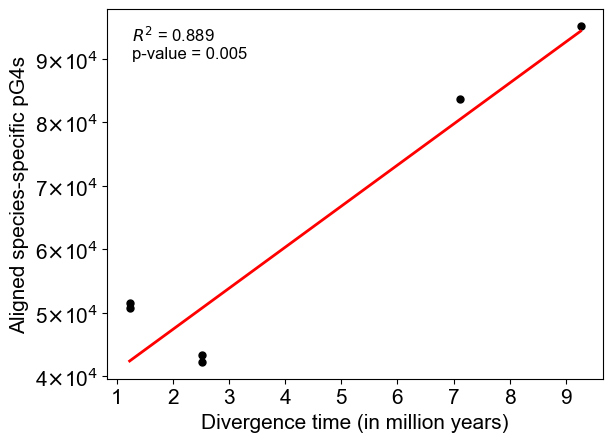

In [9]:
plt.scatter(list(species_mya.values()), alignedUniqueUpset, color="black", s=25)

# fitting the model
X = sm.add_constant(list(species_mya.values()))
model = sm.OLS(alignedUniqueUpset, X)
results = model.fit()
print(results.summary())

intercept, slope = results.params
y_pred = intercept + slope * X

plt.plot([np.min(list(species_mya.values())), np.max(list(species_mya.values()))], [np.min(y_pred), np.max(y_pred)], color="red", lw=2)
plt.gca().text(0.05, 0.96, f'$R^2$ = {results.rsquared:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12, color='#000')#, fontweight='bold')
plt.gca().text(0.05, 0.9, f'p-value = {results.pvalues[1]:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12, color='#000')

yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(t/10000)}' r'$\times$10$^4$' for t in yticks], fontsize=12)

plt.xlabel("Divergence time (in million years)", fontsize=15)
plt.ylabel("Aligned species-specific pG4s", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig(f"../plots/corrPlots/hsa{hsa}.specific.aligned.svg", format='svg', transparent=True, bbox_inches='tight')
plt.savefig(f"../plots/corrPlots/hsa{hsa}.specific.aligned.png", format='png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

##### Unaligned

In [10]:
'''To get the number of pG4s which are species-specific and unaligned'''
uniqueUpset = []
uniquedf = pd.read_csv('../datasets/pipelineOutputs/uniquehsaG.egs.gz', sep='\t', header=None, compression='gzip')
uniqueGQs = splitIDsandarrange(uniquedf)
for s in range(1,7):
    specuniqueGQs = uniqueGQs[uniqueGQs['species'] == s]
    uniqueUpset.append(specuniqueGQs.shape[0])
# to arrange according to the "order" list, change if you changed "order" above accordingly
human_element = uniqueUpset.pop(0) 
uniqueUpset.insert(2, human_element) 
sorang_element = uniqueUpset.pop(4) 
uniqueUpset.insert(5, sorang_element) 
#convert to numpy array
uniqueUpset = np.array(uniqueUpset) 
unAlignedUniqueUpset = uniqueUpset - alignedUniqueUpset

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     2.617
Date:                Sun, 10 Nov 2024   Prob (F-statistic):              0.181
Time:                        15:29:03   Log-Likelihood:                -69.569
No. Observations:                   6   AIC:                             143.1
Df Residuals:                       4   BIC:                             142.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.855e+04   2.14e+04      1.333      0.2

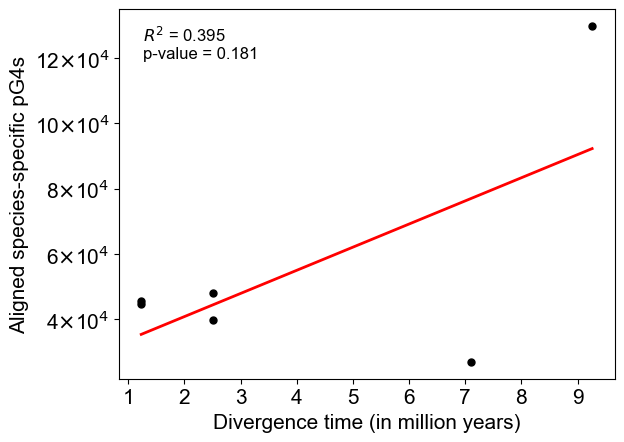

In [11]:
plt.scatter(list(species_mya.values()), unAlignedUniqueUpset, color="black", s=25)

# fitting the model
X = sm.add_constant(list(species_mya.values()))
model = sm.OLS(unAlignedUniqueUpset, X)
results = model.fit()
print(results.summary())

intercept, slope = results.params
y_pred = intercept + slope * X

plt.plot([np.min(list(species_mya.values())), np.max(list(species_mya.values()))], [np.min(y_pred), np.max(y_pred)], color="red", lw=2)
plt.gca().text(0.05, 0.96, f'$R^2$ = {results.rsquared:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12, color='#000')#, fontweight='bold')
plt.gca().text(0.05, 0.9, f'p-value = {results.pvalues[1]:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=12, color='#000')

yticks = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(t/10000)}' r'$\times$10$^4$' for t in yticks], fontsize=12)

plt.xlabel("Divergence time (in million years)", fontsize=15)
plt.ylabel("Aligned species-specific pG4s", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig(f"../plots/corrPlots/hsa{hsa}.specific.unaligned.svg", format='svg', transparent=True, bbox_inches='tight')
plt.savefig(f"../plots/corrPlots/hsa{hsa}.specific.unaligned.png", format='png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

#### Non-shared and shared pG4s

In [12]:
dic_mya = {
    "H. sapiens, P. paniscus": 7.11,
    "H. sapiens, P. troglodytes": 7.11,
    "H. sapiens, G. gorilla": 9.26,
    "H. sapiens, P. abelii": 16.9,
    "H. sapiens, P. pygmaeus": 16.9,
    "P. paniscus, P. troglodytes": 2.51,
    "P. paniscus, G. gorilla": 9.26,
    "P. paniscus, P. abelii": 16.9,
    "P. paniscus, P. pygmaeus": 16.9,
    "P. troglodytes, G. gorilla": 9.26,
    "P. troglodytes, P. abelii": 16.9,
    "P. troglodytes, P. pygmaeus": 16.9,
    "G. gorilla, P. abelii": 16.9,
    "G. gorilla, P. pygmaeus": 16.9,
    "P. abelii, P. pygmaeus": 1.23
}

mya = list(dic_mya.values())

In [13]:
speciesName = [i[3] for i in speciesnos.values()] #list of species names

''' Generate all combinations of species where 2 Trues for 4 Falses''' 
combinations_indices = list(combinations(range(6), 2))
in_pair_vals = []
for combination in combinations_indices:
    species1, species2 = [speciesName[i] for i in combination]
    combinationData = presAbs_df[(presAbs_df[species1] == 1) & (presAbs_df[species2] == 1)]
    in_pair_vals.append(len(combinationData)) #always check if the order is correct with "div_mya"

'''Pairwise distance calculation from non-shared G4s'''
total = list(presAbs_df.sum(axis = 0))
distance = []
for combination in combinations_indices:
    dist = total[combination[0]] + total[combination[1]] - 2 * in_pair_vals[combinations_indices.index(combination)]
    distance.append(dist)

'''Get the number of shared G4s'''
complementDistance = []
for combination in combinations_indices:
    dist = in_pair_vals[combinations_indices.index(combination)]
    complementDistance.append(dist)

In [14]:
rcParams['figure.figsize'] = [6.4,4.8]

##### Pairwise distance (with non-shared G4s) vs divergence time

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.953
Method:                 Least Squares   F-statistic:                     284.1
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           3.25e-10
Time:                        15:29:04   Log-Likelihood:                -179.79
No. Observations:                  15   AIC:                             363.6
Df Residuals:                      13   BIC:                             365.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.001e+05   2.56e+04      7.812      0.0

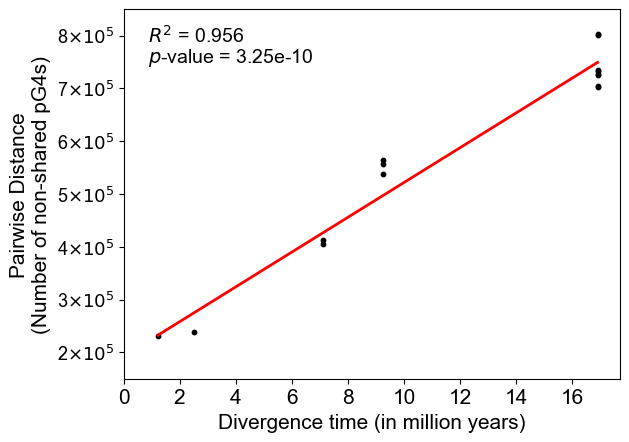

In [15]:
# Choose x and y
x_var = "MYA"
y_var = "Distance"

# Create dataframe
distvsmya = pd.DataFrame({"Distance": distance, "MYA": mya}).sort_values(x_var)

y = distvsmya[y_var]
x = distvsmya[x_var]

# fitting the model
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

intercept, slope = results.params
y_pred = intercept + slope * X

plt.plot([np.min(mya), np.max(mya)], [np.min(y_pred), np.max(y_pred)], color="red", lw=2)
plt.gca().text(0.05, 0.96, f'$R^2$ = {results.rsquared:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=14, color='#000')#, fontweight='bold')
plt.gca().text(0.05, 0.9, f'$p$-value = 3.25e-10', transform=plt.gca().transAxes, ha='left', va='top', fontsize=14, color='#000')

ax = sns.scatterplot(data=distvsmya, x=x_var, y=y_var, color='#000', marker="o", s=10, edgecolor='#000', linewidth=1)#, facecolor='none')

plt.xlabel("Divergence time (in million years)", fontsize=15)
plt.ylabel("Pairwise Distance\n(Number of non-shared pG4s)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0)
plt.ylim([150000,850000])

yticks = ax.get_yticks()
ax.set_yticklabels([f'{int(t/100000)}' r'$\times10^5$' for t in yticks], fontsize=13)

plt.savefig(f"../plots/corrPlots/hsa{hsa}.pairwise.svg", format='svg', transparent=True, bbox_inches='tight')
plt.savefig(f"../plots/corrPlots/hsa{hsa}.pairwise.png", format='png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

##### Pairwise distance (with non-shared G4s & excluding unaligned pG4s) vs divergence time

In [16]:
unAlignedUniqueUpsetOld = unAlignedUniqueUpset[[2,0,1,3,5,4]]

distanceexclude = []
for combination in combinations_indices:
    dist = total[combination[0]] + total[combination[1]] - 2 * in_pair_vals[combinations_indices.index(combination)] - unAlignedUniqueUpsetOld[combination[0]] - unAlignedUniqueUpsetOld[combination[1]]
    distanceexclude.append(dist)

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.997
Method:                 Least Squares   F-statistic:                     4059.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           1.30e-17
Time:                        15:29:04   Log-Likelihood:                -159.66
No. Observations:                  15   AIC:                             323.3
Df Residuals:                      13   BIC:                             324.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.297e+04   6696.987     13.883      0.0

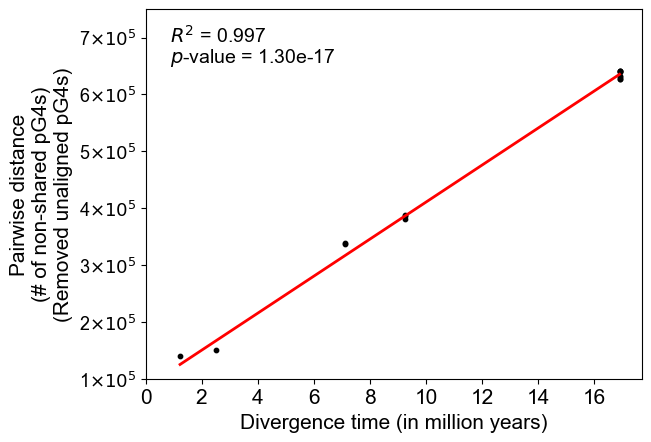

In [17]:
# Choose x and y
x_var = "MYA"
y_var = "Distance"

# Create dataframe
distvsmya = pd.DataFrame({"Distance": distanceexclude, "MYA": mya}).sort_values(x_var)

y = distvsmya[y_var]
x = distvsmya[x_var]

# fitting the model
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

intercept, slope = results.params
y_pred = intercept + slope * X

plt.plot([np.min(mya), np.max(mya)], [np.min(y_pred), np.max(y_pred)], color="red", lw=2)
plt.gca().text(0.05, 0.96, f'$R^2$ = {results.rsquared:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=14, color='#000')#, fontweight='bold')
plt.gca().text(0.05, 0.9, f'$p$-value = 1.30e-17', transform=plt.gca().transAxes, ha='left', va='top', fontsize=14, color='#000')

ax = sns.scatterplot(data=distvsmya, x=x_var, y=y_var, color='#000', marker="o", s=10, edgecolor='#000', linewidth=1)#, facecolor='none')

plt.xlabel("Divergence time (in million years)", fontsize=15)
plt.ylabel("Pairwise distance\n(# of non-shared pG4s)\n(Removed unaligned pG4s)", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0)
plt.ylim([100000,750000])

yticks = ax.get_yticks()
ax.set_yticklabels([f'{int(t/100000)}' r'$\times10^5$' for t in yticks], fontsize=13)

plt.savefig(f"../plots/corrPlots/hsa{hsa}.pairwise.exclude.svg", format='svg', transparent=True, bbox_inches='tight')
plt.savefig(f"../plots/corrPlots/hsa{hsa}.pairwise.exclude.png", format='png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()

##### Pairwise distance (with shared G4s) vs divergence time

                            OLS Regression Results                            
Dep. Variable:               Distance   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     3175.
Date:                Sun, 10 Nov 2024   Prob (F-statistic):           6.38e-17
Time:                        15:29:05   Log-Likelihood:                -151.20
No. Observations:                  15   AIC:                             306.4
Df Residuals:                      13   BIC:                             307.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       6.477e+05   3810.054    170.007      0.0

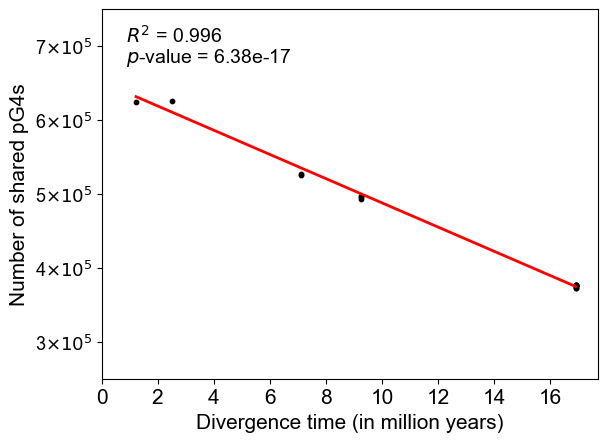

In [18]:
# Choose x and y
x_var = "MYA"
y_var = "Distance"

# Create dataframe
distvsmya = pd.DataFrame({"Distance": complementDistance, "MYA": mya}).sort_values(x_var)

y = distvsmya[y_var]
x = distvsmya[x_var]

# fitting the model
X = sm.add_constant(x)

model = sm.OLS(y, X)
results = model.fit()
print(results.summary())

intercept, slope = results.params
y_pred = intercept + slope * X

plt.plot([np.min(mya), np.max(mya)], [np.max(y_pred), np.min(y_pred)], color="red", lw=2)
plt.gca().text(0.05, 0.96, f'$R^2$ = {results.rsquared:.3f}', transform=plt.gca().transAxes, ha='left', va='top', fontsize=14, color='#000')#, fontweight='bold')
plt.gca().text(0.05, 0.9, f'$p$-value = 6.38e-17', transform=plt.gca().transAxes, ha='left', va='top', fontsize=14, color='#000')

ax = sns.scatterplot(data=distvsmya, x=x_var, y=y_var, color='#000', marker="o", s=10, edgecolor='#000', linewidth=1)#, facecolor='none')

plt.xlabel("Divergence time (in million years)", fontsize=15)
plt.ylabel("Number of shared pG4s", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlim(0)
plt.ylim([250000,750000])

yticks = ax.get_yticks()
ax.set_yticklabels([f'{int(t/100000)}' r'$\times10^5$' for t in yticks], fontsize=13)

plt.savefig(f"../plots/corrPlots/hsa{hsa}.sharewise.svg", format='svg', transparent=True, bbox_inches='tight')
plt.savefig(f"../plots/corrPlots/hsa{hsa}.sharewise.png", format='png', transparent=True, bbox_inches='tight', dpi=300)
plt.show()